In [10]:
from gensim.models import word2vec
modelb = word2vec.Word2Vec.load('basic0507.model')
models = word2vec.Word2Vec.load('basic_b5_0603.model')
model1 = word2vec.Word2Vec.load('d32_e20_w5_global_neg_0506.model')
model2 = word2vec.Word2Vec.load('d32_e20_w5_neg_0506.model')
model3 = word2vec.Word2Vec.load('d32_e20_w5_global_0506.model')
model_name = ['basic0507','basic_b5_0603','d32_e20_w5_global_neg_0506','d32_e20_w5_neg_0506','d32_e20_w5_global_0506']

In [5]:
text = []
rank_sample = []
fp = open('data/click_list_900s_stop12s_20200504.txt', "r")
# fp = open('data/simple.txt', "r")
for i,line in enumerate(iter(fp)):
    l = line.rstrip('\n')
#     print(line)
    text.append(l.split(" "))
fp.close()

for itemRow in text:
    if '-1' in itemRow:
        rank_sample.append(itemRow)

print("行數: ",len(rank_sample))

行數:  10080


In [6]:
def getRank(model,predict_word, target):
    topn = 150
    if predict_word not in model.wv.index2word:
#         print(predict_word)
        return False
    r = model.wv.most_similar(predict_word,topn=topn)
    for rank,(item,sim) in enumerate(r,1):
        if item == target:
            return rank
    return False

In [7]:
# models.wv.most_similar('AB9109417',topn=100)

In [11]:
tbale = {}
for n in model_name:
#     if n =='basic0507':
    tbale[n] = {str(i):[] for i in range(-16,0) }
    
ranking_avg = {}
for n in model_name:
    ranking_avg[n] = {}

In [12]:
%%time
for row in rank_sample:
    booked = row[-1]
    last = row[-3]
    if last==booked: #僅計算book前的點擊、不包含book本身
        del row[-3]
    for i,val in enumerate(row[::-1],1):
        if i <3 or i >16:
            continue
        tbale['basic0507'][str(-i+2)].append(getRank(modelb,val,booked))
        tbale['basic_b5_0603'][str(-i+2)].append(getRank(models,val,booked))
        tbale['d32_e20_w5_global_neg_0506'][str(-i+2)].append(getRank(model1,val,booked))
        tbale['d32_e20_w5_neg_0506'][str(-i+2)].append(getRank(model2,val,booked))
        tbale['d32_e20_w5_global_0506'][str(-i+2)].append(getRank(model3,val,booked))

CPU times: user 8h 14min 18s, sys: 9h 14min 22s, total: 17h 28min 41s
Wall time: 22min 19s


In [13]:
%%time
for n in model_name:
#     if n !='d32_e20_w5_global':
#         continue
    ranking_avg[n] = {}
    for i in tbale[n].keys():
        tbale[n][i] = list(filter(None, tbale[n][i]))
        if len(tbale[n][i])>0:
            ranking_avg[n][i] = round(sum(tbale[n][i])/len(tbale[n][i]),1)

CPU times: user 357 ms, sys: 351 ms, total: 708 ms
Wall time: 15.2 ms


## 繪圖

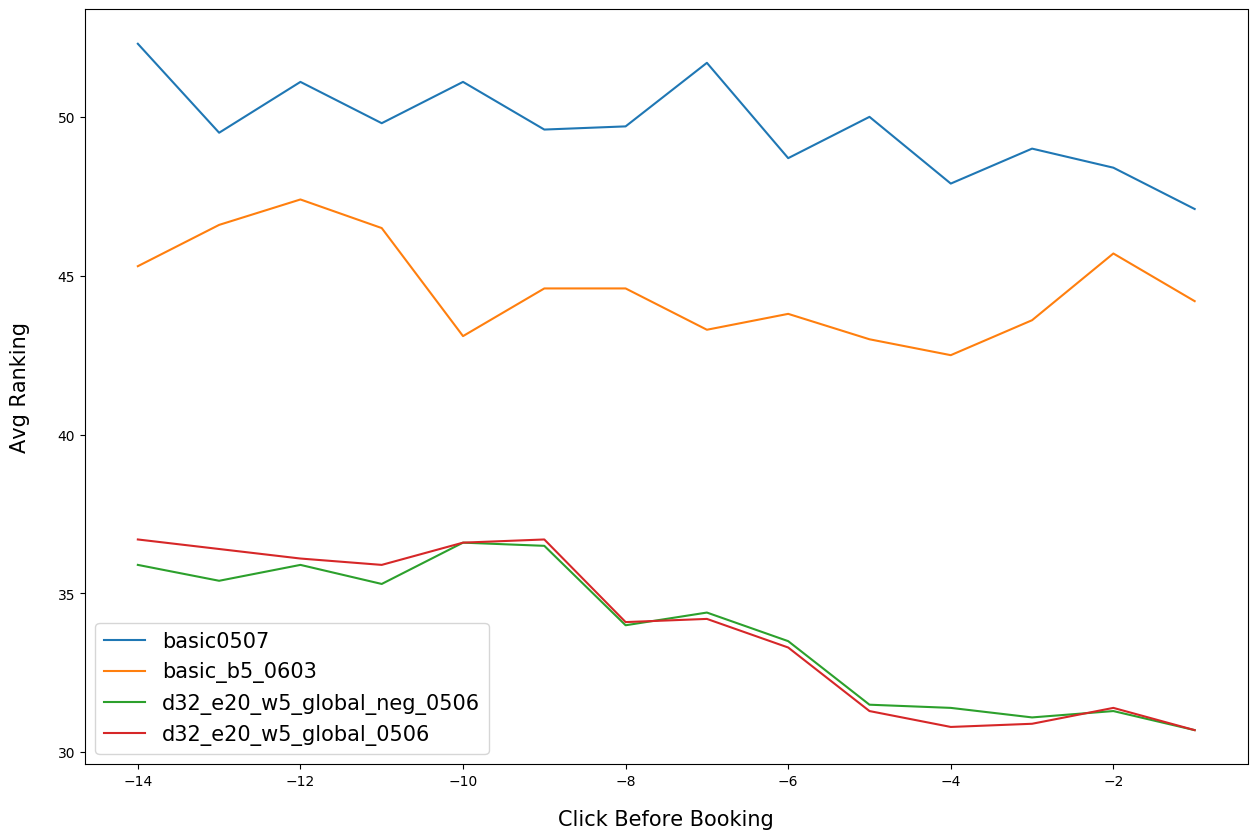

In [14]:
import matplotlib.pyplot as plt
def plotData(plt, data,name):
    click_n = 14
    x = [i for i in range(-click_n,0)]
    y = list(data[name].values())[-click_n:]
    plt.plot(x, y, '-',  label=name)
    
plt.figure(figsize=(15,10),dpi=100,linewidth = 2)

plotData(plt, ranking_avg,'basic0507')
plotData(plt, ranking_avg,'basic_b5_0603')
plotData(plt, ranking_avg,'d32_e20_w5_global_neg_0506')
# plotData(plt, ranking_avg,'d32_e20_w5_neg_0506')
plotData(plt, ranking_avg,'d32_e20_w5_global_0506')

# 標示x軸(labelpad代表與圖片的距離)
plt.xlabel("Click Before Booking", fontsize=15, labelpad = 15)

# 標示y軸(labelpad代表與圖片的距離)
plt.ylabel("Avg Ranking", fontsize=15, labelpad = 20)
plt.legend(loc = "best", fontsize=15)
plt.show()

In [53]:
for row in rank_sample:
    booked = row[-1]
#     print(row)
    for i,val in enumerate(row[::-1],1):
        if i <3:
            continue
#         print(val)
#     break

In [83]:
tbale
# predict_word = 'AO9109584'
# modelb.wv.most_similar(predict_word,topn=20)
# r = modelb.wv.most_similar(predict_word,topn=20)
# for index,(item,sim) in enumerate(r,1):
#     print(index,item)
a = [1,2,3,False]
# del a[1]
list(filter(None,a))

[1, 2, 3]